In [1]:
import shutil
import os

import pandas as pd
from scipy import ndimage

# import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
df2015 = pd.read_csv("https://firms.modaps.eosdis.nasa.gov/data/country/modis/2015/modis_2015_United_States.csv")
df2016 = pd.read_csv("https://firms.modaps.eosdis.nasa.gov/data/country/modis/2016/modis_2016_United_States.csv")
df2017 = pd.read_csv("https://firms.modaps.eosdis.nasa.gov/data/country/modis/2017/modis_2017_United_States.csv")
df2018 = pd.read_csv("https://firms.modaps.eosdis.nasa.gov/data/country/modis/2018/modis_2018_United_States.csv")
df2019 = pd.read_csv("https://firms.modaps.eosdis.nasa.gov/data/country/modis/2019/modis_2019_United_States.csv")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("OrRd"))


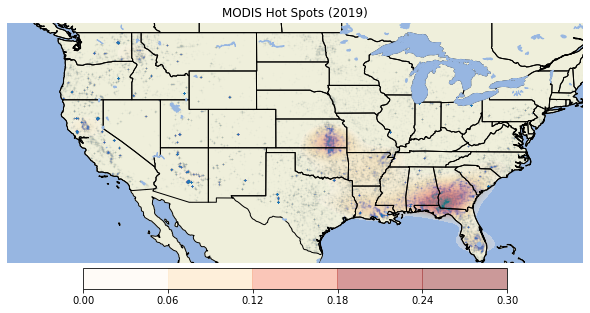

In [4]:
data = df2019
year_str = '2019'

smoothing = 30  # smoothing factor
bins=1000  # "pixel count"
cmap='hot'  # color scale
xlim = [-130,-70]
ylim = [25,50]  
heatmap, xedges, yedges = np.histogram2d(data['latitude'], data['longitude'],bins=bins, range=[ylim, xlim])
extent = [yedges[0], yedges[-1],
                  xedges[-1], xedges[0]]
logheatmap = np.log(heatmap)
logheatmap[np.isneginf(logheatmap)] = 0
logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')  # smooth out peaks
logheatmap[logheatmap < 0.0001] = 0  # clearly show areas without occurence
# logheatmap = np.max(logheatmap) - logheatmap  # reverse color scale

logheatmap = np.ma.masked_where(logheatmap < 0.05, logheatmap)

figure, ax = plt.subplots(figsize=(10,8), ncols=1,facecolor='white')

cmap = plt.cm.OrRd
cmap.set_bad(color='white',alpha=0.01)

m = plt.cm.ScalarMappable(cmap=cm.hot)
m.set_array(logheatmap)
m.set_clim(0., 0.3)

PC = ccrs.PlateCarree()

ax = plt.axes(projection=PC)
ax.axis('off')
pos = ax.imshow(logheatmap, cmap=cmap, extent=extent, transform=PC, alpha=0.4)
# ax.invert_yaxis()
ax.set(xlim=xlim, ylim=ylim)

p16 = plt.scatter(data['longitude'], data['latitude'], marker='.', s=1,
            c='tab:blue', transform=PC, alpha=0.01)
# sns.scatterplot(data=df2015, x="longitude", y="latitude", s=5, color=".15")

# ax.set(xlim=(-130,-70),ylim=(25,50))

aspect = 20
pad_fraction = 0.5

# cbar_ax = figure.add_axes([0, 0, 0.1, 0.1])
figure.subplots_adjust(hspace=0, wspace=0, top=0.925, left=0.1)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.margins(0)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

figure.colorbar(pos, orientation="horizontal", fraction=0.046, pad=0.01,boundaries=np.linspace(0, 0.3, 6))

plt.title('MODIS Hot Spots (' + year_str + ')')

source_image = './modis' + year_str + '.png'

plt.savefig(source_image,dpi=1200,facecolor=figure.get_facecolor(), transparent=False, bbox_inches="tight", pad_inches=0)
